<a href="https://colab.research.google.com/github/banhgiaman/Assignment_CoderSchool/blob/master/WineDataset_Group01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploration ideas
1. How these factors affect the quality of wine?
2. How these factors coorelate with each others?
3. How these factors allocated in different kind of wine?

## Checking data

## Load data

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [0]:
link = "https://drive.google.com/open?id=151Xj_kWTUfsrEtgHGCW5x3DyKzehK208"
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('01_winequalityN.csv')  
df = pd.read_csv('01_winequalityN.csv')

## Overview

In [0]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Target variable: 
   12 - quality (score between 0 and 10)

In [0]:
df.rename(index=str, columns={'type':'type',
                              'fixed acidity': 'fixed_acidity',
                              'volatile acidity': 'volatile_acidity',
                              'citric acid': 'citric_acid',
                              'residual sugar': 'residual_sugar',
                              'free sulfur dioxide': 'free_sulfur_dioxide',
                              'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)

In [0]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed_acidity           6487 non-null float64
volatile_acidity        6489 non-null float64
citric_acid             6494 non-null float64
residual_sugar          6495 non-null float64
chlorides               6495 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


## Cleaning data

In [0]:
df.isna().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [0]:
# remove rows with missing value
df.dropna(inplace=True)

In [0]:
df[df.duplicated(keep=False)]

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
38,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.6,5
39,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.6,5


In [0]:
df.drop_duplicates(inplace=True)

In [0]:
df.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00
mean,7.22,0.34,0.32,5.05,0.06,30.05,114.12,0.99,3.22,0.53,10.55,5.80
std,1.32,0.17,0.15,4.50,0.04,17.83,56.79,0.00,0.16,0.15,1.19,0.88
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.24,1.80,0.04,16.00,74.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.30,0.31,2.70,0.05,28.00,116.00,0.99,3.21,0.51,10.40,6.00
75%,7.70,0.41,0.40,7.50,0.07,41.00,154.00,1.00,3.33,0.60,11.40,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


There are huge differences between 75% percentile and max value so there might be outliers in "residual_sugar", "free_sulfur_dioxide", "total_sulfur_dioxide".

In [0]:
df.groupby(by=['type']).count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353
white,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942


There are 2 types of wine including white and red wine. The number of records of white wine is 3 times higher than that of red wine

In [0]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

Variable "quality" is discrete

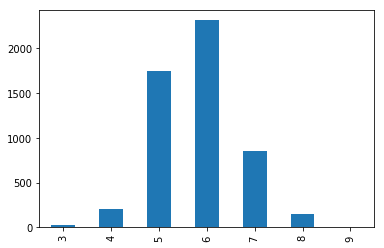

In [0]:
df.quality.value_counts().sort_index().plot(kind='bar');

"quality" is mostly allocated in 6, 5, 7 band

In [0]:
t = df.groupby(by='type').mean()
t

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,8.318477,0.529294,0.273016,2.522986,0.088163,15.854398,46.822986,0.996715,3.309165,0.658374,10.428394,5.623799
white,6.840297,0.280430,0.334490,5.918721,0.045887,34.918062,137.215753,0.993788,3.195287,0.490236,10.591945,5.855150


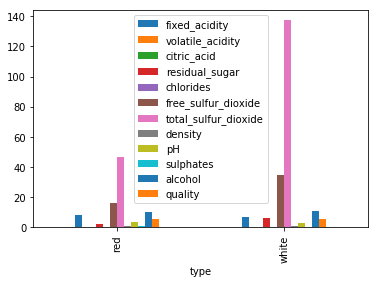

In [0]:
t.plot(kind='bar')

White wine appears to be better than red wine

## Examine one variable

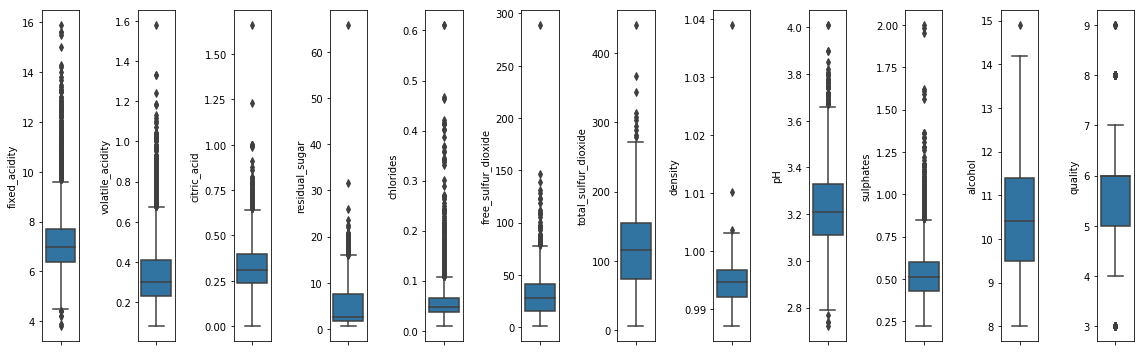

In [0]:
f, axes = plt.subplots(1, 12, figsize=(16, 5))
col = df.columns.values
col = np.delete(col, 0)
for i in range(len(col)):
    sns.boxplot(df[col[i]], ax=axes[i],orient='v')
    plt.tight_layout() 

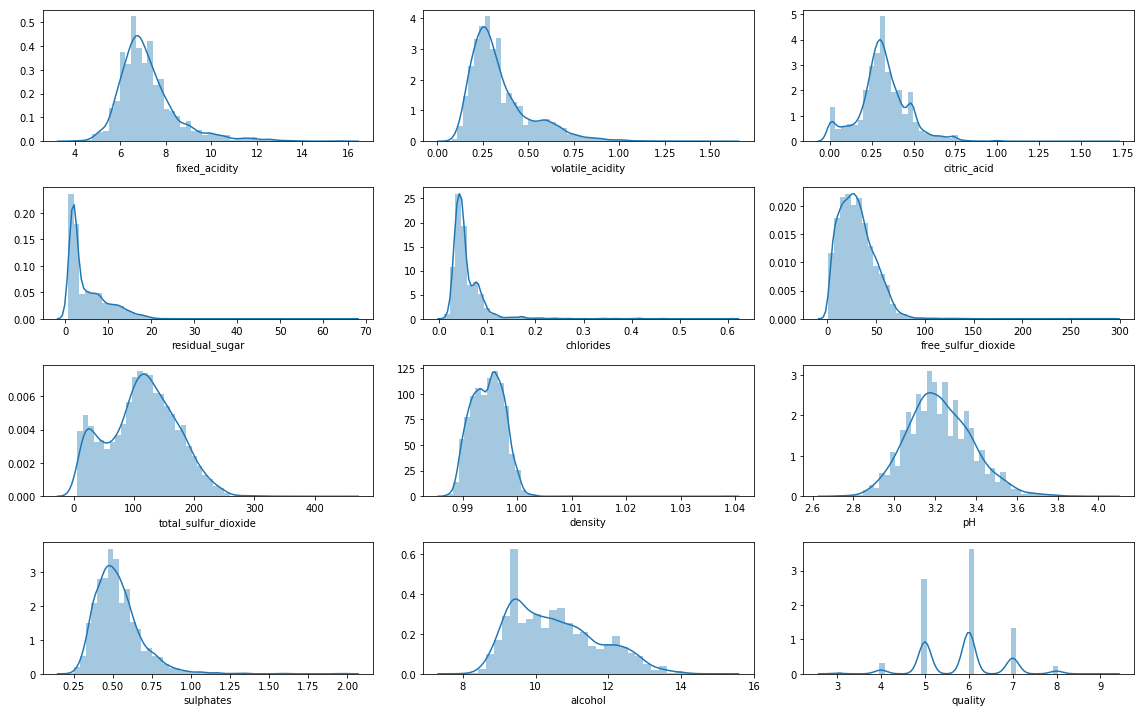

In [0]:
f, axes = plt.subplots(4, 3, figsize=(16, 10))
for i in range(4):
    for j in range(3):
        sns.distplot(df[col[i*3+j]], ax=axes[i,j])
        plt.tight_layout()

pH is likely to be normally distributed

Other variables are left skewed

There are a lot of outliers in this dataset

## Check correlation

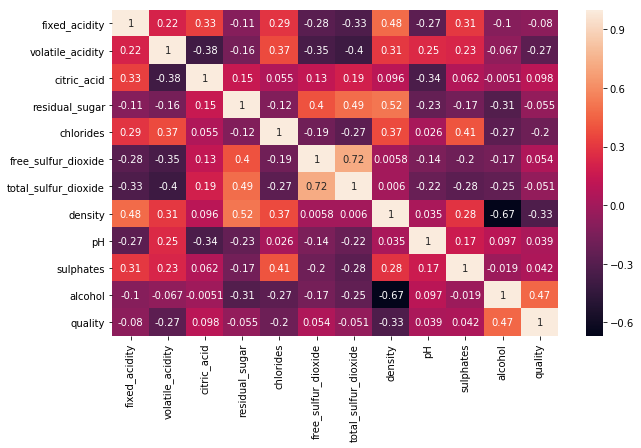

In [0]:
correlation = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True);

In [0]:
correlation['quality'].sort_values()

density                -0.325338
volatile_acidity       -0.265214
chlorides              -0.202016
fixed_acidity          -0.079599
residual_sugar         -0.054625
total_sulfur_dioxide   -0.050728
pH                      0.038903
sulphates               0.041806
free_sulfur_dioxide     0.053786
citric_acid             0.097926
alcohol                 0.470143
quality                 1.000000
Name: quality, dtype: float64

There is positive correlation between alcohol and quality.

There are negative correlations between quality and density, volatile acidity, and chlorides.

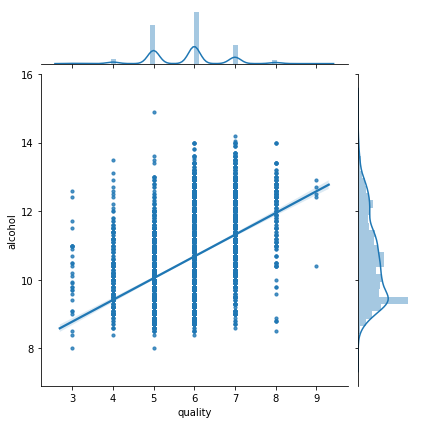

In [0]:
alcohol_quality = df[['alcohol', 'quality']]
gridA = sns.JointGrid(x="quality", y="alcohol", data=alcohol_quality, size=6)
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA = gridA.plot_marginals(sns.distplot)

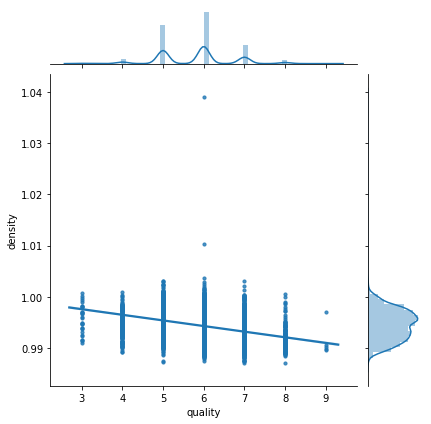

In [0]:
temp = df[['density', 'quality']]
gridA = sns.JointGrid(x="quality", y="density", data=temp, size=6)
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA = gridA.plot_marginals(sns.distplot)

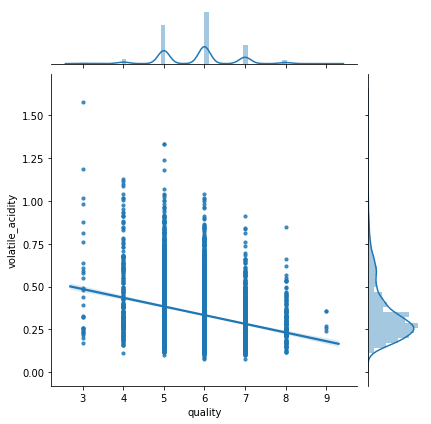

In [0]:
temp = df[['volatile_acidity', 'quality']]
gridA = sns.JointGrid(x="quality", y="volatile_acidity", data=temp, size=6)
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA = gridA.plot_marginals(sns.distplot)

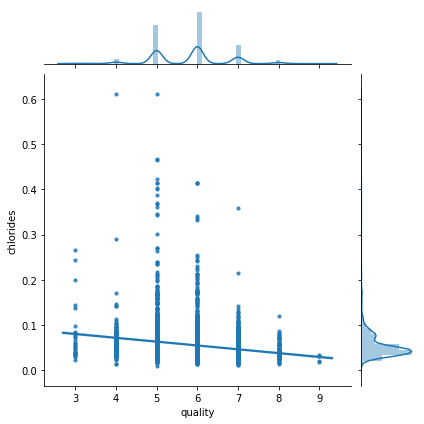

In [0]:
temp = df[['chlorides', 'quality']]
gridA = sns.JointGrid(x="quality", y="chlorides", data=temp, size=6)
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA = gridA.plot_marginals(sns.distplot)

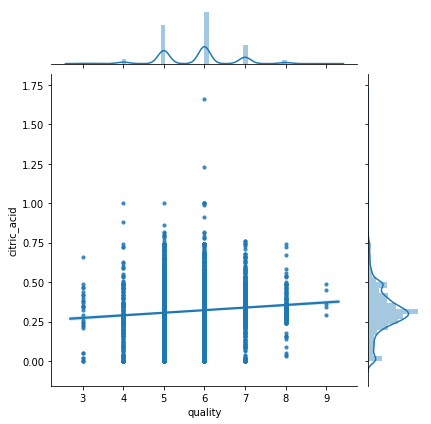

In [0]:
temp = df[['citric_acid', 'quality']]
gridA = sns.JointGrid(x="quality", y="citric_acid", data=temp, size=6)
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA = gridA.plot_marginals(sns.distplot)

### Other interesting correlation

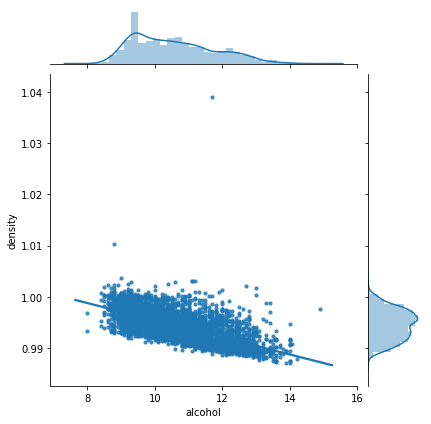

In [0]:
alcohol_density = df[['alcohol', 'density']]
gridA = sns.JointGrid(x="alcohol", y="density", data=alcohol_density, size=6)
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA = gridA.plot_marginals(sns.distplot)

### Examine multivariate 

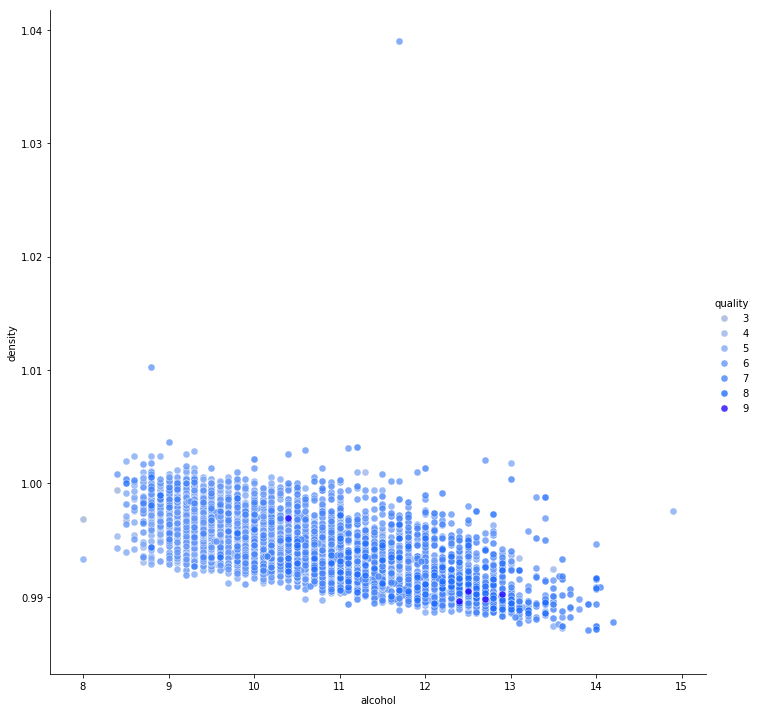

In [0]:
g = sns.FacetGrid(df, hue="quality", palette=sns.color_palette(["#9FB3D9", "#9AB5E9", "#82AAF6", "#6698F8", "#4885F9", "#226EFD", "#2507FD"]), height=10)
g.map(plt.scatter, "alcohol", "density", s=50, alpha=.8, linewidth=.5, edgecolor="white")
g.add_legend();

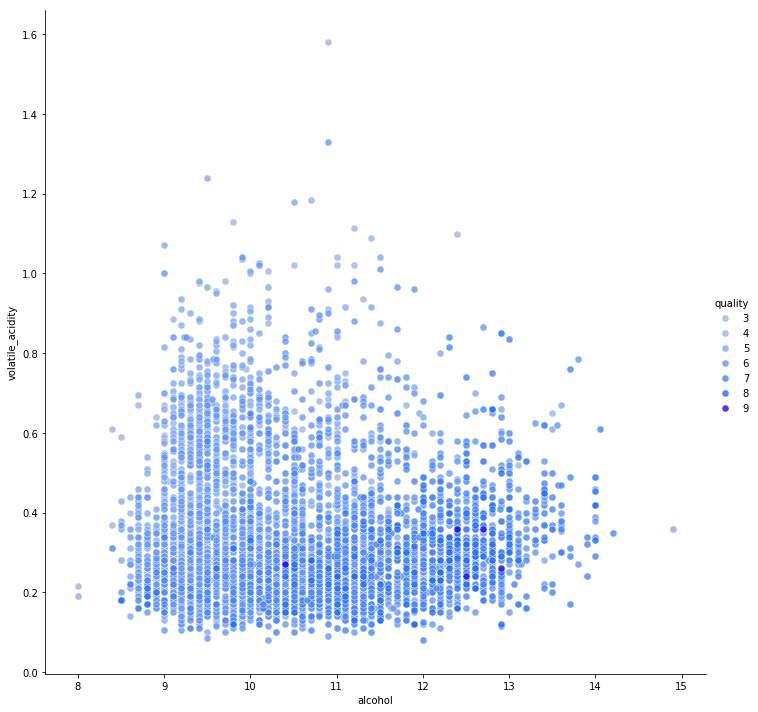

In [0]:
g = sns.FacetGrid(df, hue="quality", palette=sns.color_palette(["#9FB3D9", "#9AB5E9", "#82AAF6", "#6698F8", "#4885F9", "#226EFD", "#2507FD"]), height=10)
g.map(plt.scatter, "alcohol", "volatile_acidity", s=50, alpha=.8, linewidth=.5, edgecolor="white")
g.add_legend();

# Conclusion
1. The higher alcohol level, the better wine quality
2. The lower water density, violatile acidity, chlorides, the better wine quality.
3. White wine appears to have higher quality
